In [279]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [280]:
#create the "space"
N = 100 #number of points in grid
L = 1 #boundary
x_start, x_end = -L,L #boundaries
y_start, y_end = -L,L #boundaries
x = np.linspace(x_start, x_end, N) #generates coordinates
y = np.linspace(y_start, y_end, N) #generates coordinates
X, Y = np.meshgrid(x,y)

In [281]:
charges = [] #array to hold all charges

In [282]:
#create point charge class

class PointCharge:
    e_0 = 8.854e-12
    k = 1/(4*np.pi*e_0)
    
    def __init__(self,q,x_init,y_init):
        self.q = q
        self.x = x_init
        self.y = y_init
        if self.q > 0:
            self.color = "r"
        elif self.q < 0:
            self.color = "b"
        else:
            self.color = "white"
        
        self.efield_x = self.k * (self.q * (X-self.x))/((X-self.x)**2+(Y-self.y)**2)**(3/2)
        self.efield_y = self.k * (self.q * (Y-self.y))/((X-self.x)**2+(Y-self.y)**2)**(3/2)
               
        self.total_efield = np.sqrt(self.efield_x**2 + self.efield_y**2)
        #for scaling
        self.total_efield = self.total_efield**(1/10)
                
        charges.append(self)

In [283]:
def plot_electric_field(charge):
    width = 10
    height = (y_end - y_start) / (x_end - x_start) * width
    plt.figure(figsize=(width,height))
    plt.xlabel("x",fontsize=16)
    plt.ylabel("y",fontsize=16)
    plt.xlim(x_start,x_end)
    plt.ylim(y_start,y_end)
    plt.streamplot(X,Y,
                   charge.efield_x,charge.efield_y,
                   density=1,
                   linewidth=2,
                   color="black",
                   arrowsize=2,
                   arrowstyle="->")
    plt.imshow(charge.total_efield,
              interpolation="bilinear",
              cmap="RdBu",
              origin="lower",
              extent=[-1,1,-1,1])
    plt.colorbar()
    plt.scatter(charge.x,charge.y,
               color=charge.color,
               s=20,
               marker="o")

In [284]:
def plot_all_charges(charges_array):
    width = 10
    height = (y_end - y_start) / (x_end - x_start) * width
    plt.figure(figsize=(width,height))
    plt.xlabel("x",fontsize=16)
    plt.ylabel("y",fontsize=16)
    plt.xlim(x_start,x_end)
    plt.ylim(y_start,y_end)
    
    sum_efield_x = np.sum([i.efield_x for i in charges_array], axis=0)
    sum_efield_y = np.sum([i.efield_y for i in charges_array], axis=0)
    
    sum_efields = np.sum([i.total_efield for i in charges_array], axis=0)
    
    x_all, y_all = [i.x for i in charges_array],[i.y for i in charges_array]
    colors = [i.color for i in charges_array]
    
    plt.streamplot(X,Y,
                   sum_efield_x, sum_efield_y,
                   density=1,
                   linewidth=2,
                   color="black",
                   arrowsize=2,
                   arrowstyle="->") 
    plt.imshow(sum_efields,
               cmap="coolwarm",
               origin="lower",
               extent=[x_start,x_end,y_start,y_end])
    plt.scatter(x_all,y_all,
               color=colors,
               s=80,
               marker="o")

In [285]:
Q = 1
PointCharge(-Q,0.5,0)
PointCharge(-Q,-0.5,0)
PointCharge(Q,0,0.5)
PointCharge(Q,0,-0.5)
# for i in range(100):
#     PointCharge(np.random.choice([-Q,Q]),
#                np.random.uniform(-L,L),
#                np.random.uniform(-L,L))

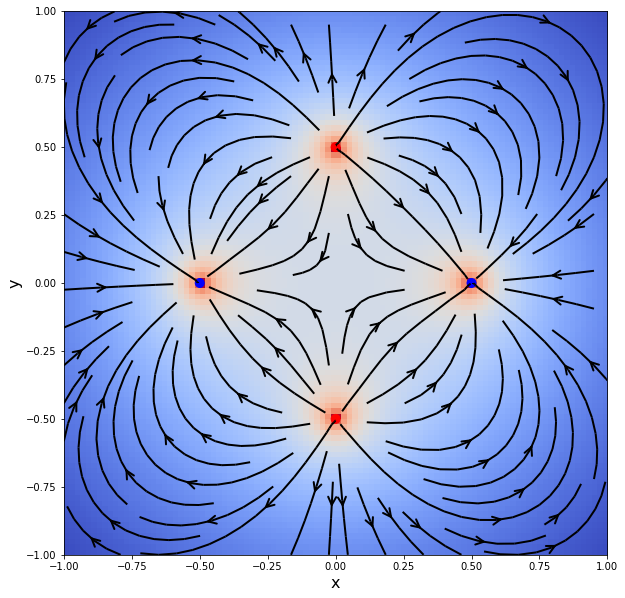

In [286]:
# plot_electric_field(a)
plot_all_charges(charges)